In [2]:
from pathlib import Path
import cv2
import numpy as np
import json
from matplotlib import pyplot as plt
from xtcocotools.coco import COCO

In [3]:
DATASET_DIR = Path("mp100")

In [18]:
anno_list = sorted(list((DATASET_DIR / "annotations").glob("*.json")))
for idx, anno_file in enumerate(anno_list):
    print(f"{idx}: {anno_file.name}")
anno_file = anno_list[13]
anno = COCO(anno_file)

0: mp100_split1_test.json
1: mp100_split1_train.json
2: mp100_split1_val.json
3: mp100_split2_test.json
4: mp100_split2_train.json
5: mp100_split2_val.json
6: mp100_split3_test.json
7: mp100_split3_train.json
8: mp100_split3_val.json
9: mp100_split4_test.json
10: mp100_split4_train.json
11: mp100_split4_val.json
12: mp100_split5_test.json
13: mp100_split5_train.json
14: mp100_split5_val.json
loading annotations into memory...
Done (t=0.32s)
creating index...
index created!


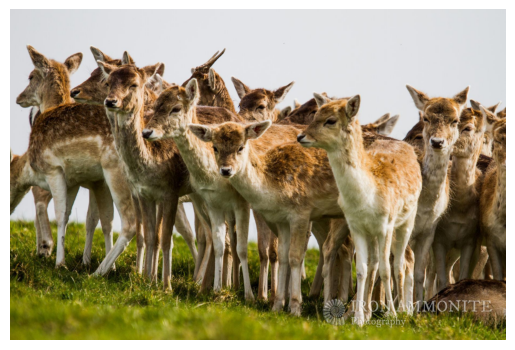

In [26]:
# img_id = anno.getImgIds()[0]
img_id = 2300000000009992
img = cv2.imread(str(DATASET_DIR / anno.loadImgs(img_id)[0]['file_name']))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Number of annotations for image 2300000000009992: 1
Image dimensions: 1844x1230
Bounding box for the first annotation: [744.2844924926758, 505.6812744140625, 136.9438934326172, 128.5809326171875]


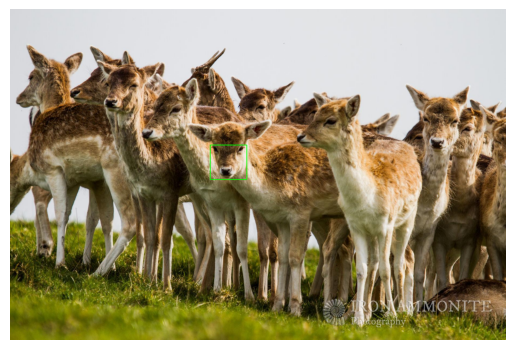

In [27]:
ann_ids = anno.getAnnIds(imgIds=img_id)
objs = anno.loadAnns(ann_ids)

print(f"Number of annotations for image {img_id}: {len(objs)}")

obj = objs[0]
bbox = obj['bbox']

width, height = anno.loadImgs(img_id)[0]['width'], anno.loadImgs(img_id)[0]['height']

print(f"Image dimensions: {width}x{height}")
print(f"Bounding box for the first annotation: {bbox}")

# Draw bounding box on the image
x, y, w, h = map(int, bbox)
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Keypoints for the first annotation: [843.1731567382812, 599.24560546875, 2.0, 848.7857666015625, 617.4864501953125, 2.0, 903.7421264648438, 614.9140014648438, 2.0, 929.4663696289062, 602.2857666015625, 2.0, 831.7141723632812, 716.8756103515625, 2.0, 875.2115478515625, 704.715087890625, 2.0, 887.83984375, 701.4410400390625, 2.0, 854.1644287109375, 728.1007690429688, 2.0, 863.051025390625, 729.50390625, 2.0]
Keypoint 0: (843.1731567382812, 599.24560546875), visibility: 2.0
Keypoint 1: (848.7857666015625, 617.4864501953125), visibility: 2.0
Keypoint 2: (903.7421264648438, 614.9140014648438), visibility: 2.0
Keypoint 3: (929.4663696289062, 602.2857666015625), visibility: 2.0
Keypoint 4: (831.7141723632812, 716.8756103515625), visibility: 2.0
Keypoint 5: (875.2115478515625, 704.715087890625), visibility: 2.0
Keypoint 6: (887.83984375, 701.4410400390625), visibility: 2.0
Keypoint 7: (854.1644287109375, 728.1007690429688), visibility: 2.0
Keypoint 8: (863.051025390625, 729.50390625), visibili

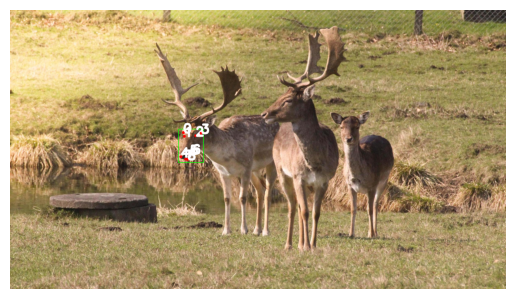

In [25]:
keypoints = obj.get('keypoints', [])
num_keypoints = obj.get('num_keypoints', 0)
print(f"Keypoints for the first annotation: {keypoints}")

if num_keypoints > 0:
    joints_3d = np.zeros((num_keypoints, 3), dtype=np.float32)
    joints_3d_visible = np.zeros((num_keypoints, 3), dtype=np.float32)

    keypoints = np.array(obj['keypoints']).reshape(-1, 3)
    # joints_3d[:, :2] = keypoints[:, :2]
    # joints_3d_visible[:, :2] = np.minimum(1, keypoints[:, 2:3])

    # print(keypoints.shape)
    # print(joints_3d.shape)
    # print(joints_3d_visible.shape)

    # print(f"keypoints: {keypoints}")
    # print(f"3D joints: {joints_3d}")
    # print(f"Visible joints: {joints_3d_visible}")

    for i, (x, y, v) in enumerate(keypoints):
        print(f"Keypoint {i}: ({x}, {y}), visibility: {v}")
        cv2.circle(img, (int(x), int(y)), min(int(np.sqrt(h*w)*0.05), 10), (0, 0, 255) if v > 0 else (255, 0, 0), -1)
        cv2.putText(img, str(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 10)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [29]:
print(obj['category_id'])
anno.cats

23


{48: {'supercategory': 'animal_face',
  'id': 48,
  'name': 'goldenretriever_face',
  'keypoints': ['0', '1', '2', '3', '4', '5', '6', '7', '8'],
  'skeleton': [[0, 1],
   [1, 2],
   [1, 4],
   [4, 2],
   [2, 3],
   [4, 7],
   [4, 5],
   [4, 6],
   [5, 7],
   [6, 7],
   [5, 8],
   [6, 8],
   [7, 8]]},
 37: {'supercategory': 'animal_face',
  'id': 37,
  'name': 'camel_face',
  'keypoints': ['0', '1', '2', '3', '4', '5', '6', '7', '8'],
  'skeleton': [[0, 1],
   [1, 2],
   [1, 4],
   [4, 2],
   [2, 3],
   [4, 7],
   [4, 5],
   [4, 6],
   [5, 7],
   [6, 7],
   [5, 8],
   [6, 8],
   [7, 8]]},
 10: {'supercategory': 'animal_face',
  'id': 10,
  'name': 'klipspringer_face',
  'keypoints': ['0', '1', '2', '3', '4', '5', '6', '7', '8'],
  'skeleton': [[0, 1],
   [1, 2],
   [1, 4],
   [4, 2],
   [2, 3],
   [4, 7],
   [4, 5],
   [4, 6],
   [5, 7],
   [6, 7],
   [5, 8],
   [6, 8],
   [7, 8]]},
 22: {'supercategory': 'animal_face',
  'id': 22,
  'name': 'guanaco_face',
  'keypoints': ['0', '1', '2

In [4]:
anno_list = sorted(list((DATASET_DIR / "annotations").glob("*.json")))
for idx, anno_file in enumerate(anno_list):
    with open(anno_file, 'r') as f:
        anno_data = json.load(f)
    for img in anno_data['images']:
        dir_name = img['file_name'].split('/')[0]
        if (dir_name == 'human_hand'):
            print(anno_file)
            break

mp100/annotations/mp100_split1_train.json
mp100/annotations/mp100_split2_train.json
mp100/annotations/mp100_split3_train.json
mp100/annotations/mp100_split4_test.json
mp100/annotations/mp100_split5_train.json
